In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Scocial Media Data Mining/SourceCode/Thu_LogisticRegression/UIT-ViCTSD/Toxicity

/content/drive/.shortcut-targets-by-id/1CZcWZiWtxpQUuZayUBOYLquIpN5fLP1b/Scocial Media Data Mining/SourceCode/Thu_LogisticRegression/UIT-ViCTSD/Toxicity


In [ ]:
path= "/content/drive/MyDrive/Scocial Media Data Mining/"

# 1. Import thư viện

In [ ]:
import torch
import pandas as pd
import numpy as np
import pickle

In [ ]:
!pip install pyvi

     |████████████████████████████████| 8.5MB 5.5MB/s 
     |████████████████████████████████| 747kB 33.3MB/s 


In [ ]:
#Model
from sklearn.linear_model import LogisticRegression

#Tách từ
from pyvi import ViTokenizer, ViPosTagger
import re

#Xử lý label
from sklearn.preprocessing import LabelEncoder

#Xử lý biến đổi doc về dạng if-idf
from sklearn.feature_extraction.text import TfidfVectorizer

#Matrix đánh giá
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

# Vẽ đò thị
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import metrics

#Tạo report
from sklearn.metrics import classification_report

# 2. Load data

In [ ]:
train = pd.read_csv(path + "Dataset/UIT-ViCTSD/UIT-ViCTSD_train.csv", index_col=False)
dev = pd.read_csv(path + "Dataset/UIT-ViCTSD/UIT-ViCTSD_valid.csv", index_col=False)
test = pd.read_csv(path + "Dataset/UIT-ViCTSD/UIT-ViCTSD_test_text.csv", index_col=False)

X_train = train['Comment']
y_train = train['Toxicity'].values

X_dev = dev['Comment']
y_dev = dev['Toxicity'].values

X_test = test['Comment']
#y_test = test['toxicity'].values

X_train.sample(10)

4848      Chuẩn bị gặt lúa lại thấy bão. Năm nào cũng vậy
6767    Phương Oanh đẹp nhất nhưng nếu mặc đầm màu sán...
520     Thật tốt khi người nhà nhận diện ra. Hi vọng m...
2248    nói chung thì mọi thứ để dự trữ tài sản đều tă...
2862    M10 lại toả sáng rực rỡ rồi, ko có M10 hút toà...
5233         Lời nhạc mà như đối thoại, chả có gì đặc sắc
4123        Đúng chất ai cập , từ bé đã dc thấy qua phim 
6773    Càng gây cấn càng kịch tính hình ảnh Trump càn...
1540                       Thật đáng tự hào. Chúc mừng em
6857    Sao lại nhiều cầm thú thế này? Hết mẹ chăn dắt...
Name: Comment, dtype: object

# 3. Tiền xử lý data

In [ ]:
#Load stop word
with open(path + "SourceCode/Thu_LogisticRegression/vietnamese-stopwords.txt") as f:
  stopwords = [x.rstrip() for x in f]
print(stopwords)

#Xóa stop word
def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in stopwords:
            words.append(word)
    return ' '.join(words)

#Tiền xử lý
def preProcess(X_data):
  X_data = X_data.lower() #Chuyển về chữ viết thường
  X_data = ViTokenizer.tokenize(X_data) #Tách từ
  X_data = re.sub(r'\W+', ' ', X_data) #Bỏ ký tự đặt biệt
  X_data = re.sub(r'\w*\d\w*', '', X_data).strip()
  X_data = remove_stopwords(X_data) #Xóa stop word
  return X_data

['a lô', 'a ha', 'ai', 'ai ai', 'ai nấy', 'ai đó', 'alô', 'amen', 'anh', 'anh ấy', 'ba', 'ba ba', 'ba bản', 'ba cùng', 'ba họ', 'ba ngày', 'ba ngôi', 'ba tăng', 'bao giờ', 'bao lâu', 'bao nhiêu', 'bao nả', 'bay biến', 'biết', 'biết bao', 'biết bao nhiêu', 'biết chắc', 'biết chừng nào', 'biết mình', 'biết mấy', 'biết thế', 'biết trước', 'biết việc', 'biết đâu', 'biết đâu chừng', 'biết đâu đấy', 'biết được', 'buổi', 'buổi làm', 'buổi mới', 'buổi ngày', 'buổi sớm', 'bà', 'bà ấy', 'bài', 'bài bác', 'bài bỏ', 'bài cái', 'bác', 'bán', 'bán cấp', 'bán dạ', 'bán thế', 'bây bẩy', 'bây chừ', 'bây giờ', 'bây nhiêu', 'bèn', 'béng', 'bên', 'bên bị', 'bên có', 'bên cạnh', 'bông', 'bước', 'bước khỏi', 'bước tới', 'bước đi', 'bạn', 'bản', 'bản bộ', 'bản riêng', 'bản thân', 'bản ý', 'bất chợt', 'bất cứ', 'bất giác', 'bất kì', 'bất kể', 'bất kỳ', 'bất luận', 'bất ngờ', 'bất nhược', 'bất quá', 'bất quá chỉ', 'bất thình lình', 'bất tử', 'bất đồ', 'bấy', 'bấy chầy', 'bấy chừ', 'bấy giờ', 'bấy lâu', 'bấy lâ

In [ ]:
X_train_pro = X_train.apply(preProcess)
X_test_pro = X_test.apply(preProcess)
X_dev_pro = X_dev.apply(preProcess)

In [ ]:
X_train_pro.sample(20)

6467                        ôi cháu đậu trường y roài vui
2298    covid chẳng nể kể_cả tổng_thống đeo khẩu_trang...
1181    đi phù_hợp tiêu_chí đấy lỗi cột lái hiện_tại f...
909     rối_loạn phân_ly lớp cô_giáo lớp chạy choáng t...
4901                           ác yêu_thương đánh như_vậy
6722    mới_đầu_đọc lướt tỉ_số tưởng trận beyern vs ba...
1071                                     cửu_âm trân kinh
5832    hình_ảnh nằm co_ro có_lẽ tại_sao cha_mẹ xót th...
792                               mặt_khác sài_gòn hoa_lệ
5157                                           chả đi học
646     trừ tp lương công_việc cầm tiền quê mua đất số...
4377    bọn côn_đồ hưởng án khoan_hồng tất_cả vụ gián_...
2223                                       câu đáp_án b c
4777                                    tuyệt_vời arsenal
4455    bi phá_hủy có_thể trực_chiến toàn_bộ phòng sẳn...
4348    người_ta đếm tương_lai cơ_sở dữ_kiện sống hiện...
4807    việt nam ta nhân_tài lá mùa thu chúc_mừng việt...
4660          

# 4. Xây dựng mô hình

In [ ]:
#Biến đổi nhãn về dạng số
le = LabelEncoder()
le.fit(y_train)
#Save le
with open('le.pkl', 'wb') as f:
    pickle.dump(le, f)

In [ ]:
y_train_encoding = le.transform(y_train)
y_dev_encoding = le.transform(y_dev)

In [ ]:
#Biến đỗi các doc về dạng if-idf
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train_pro)
print(tfidf_vect.vocabulary_) 
#Save tfidf_vect
with open('tfidf_vect.pkl', 'wb') as f:
    pickle.dump(tfidf_vect, f)

{'tuyệt_vời': 8601, 'mỹ': 5185, 'tuột_dốc': 8623, 'vực': 9602, 'dậy': 2274, 'lái': 4338, 'xe_hơi': 9672, 'bấm': 629, 'còi': 1609, 'lịch_sự': 4589, 'văn_minh': 9434, 'đường_xá': 10397, 'sử_dụng': 7351, 'kiên_nhẫn': 3892, 'nháy': 5663, 'đèn': 10287, 'đòi': 10312, 'ưu_tiên': 10740, 'đi': 10116, 'đại': 10405, 'coi': 1412, 'dịch': 2298, 'giặc': 2683, 'xâm_nhập': 9780, 'vn': 9295, 'đầu_hàng': 10462, 'cút': 1715, 'xéo': 9789, 'tự_hào': 9135, 'thương': 7775, 'bé': 472, 'rời': 6911, 'cha_mẹ': 928, 'chia': 960, 'buồn': 380, 'gia_đình': 2534, 'cầu_mong': 1855, 'vui': 9313, 'thế_giới': 7901, 'sevila': 6992, 'đoạt': 10193, 'cúp': 1714, 'loạt': 4230, 'đá': 10231, 'luân_lưu': 4265, 'nha': 5551, 'angelina': 78, 'jolie': 3593, 'đôi': 10332, 'bàn_tay': 410, 'nổi': 6061, 'gân_guốc': 2755, 'thế_nào': 7908, 'xử_lý': 9877, 'gã': 2757, 'đánh': 10243, 'bùm': 532, 'hình': 3230, 'bộ_nhớ': 798, 'máy_tính': 4912, 'chứa': 1345, 'không_trung': 3775, 'yên_tĩnh': 9904, 'dí': 2201, 'súng': 7213, 'bóp': 520, 'cò': 1608

In [ ]:
X_train_tfidf =  tfidf_vect.transform(X_train_pro)         
X_test_tfidf =  tfidf_vect.transform(X_test_pro)
X_dev_tfidf =  tfidf_vect.transform(X_dev_pro)

In [ ]:
#Mô hình LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train_encoding)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Lấy Toxicity_pred
test['Toxicity'] = 0
y_test = test['Toxicity'].values #Gán cho y_test giá trị constant= 0 để đủ 2 cột đưa vào hàm
y_test_encoding = le.transform(y_test)

y_pred = lr.predict(X_test_tfidf)
pd.DataFrame({"Toxicity_pred": y_pred}).to_csv('LogisticRegression_ViCTSD_Toxicity_Test.csv', index= False)

In [ ]:
#Save model
with open('LogisticRegression.pkl', 'wb') as f:
    pickle.dump(lr, f)

# 5. Đánh giá mô hình

In [ ]:
labelTest= pd.read_json(path + "Dataset/UIT-ViCTSD/LabelTest.json")
labelTest.head()

,,id,comment,constructiveness,toxicity,title,topic
0,0,6252,Người ăn không hết kẻ lần chẳng ra,0,1,28 năm chịu đựng bộ ngực khổng lồ,SucKhoe
1,1,4684,Nhiều người cứ nghĩ đạp xe là văn minh. haizzzz,0,1,Cả trăm người đạp xe thể dục bịt kín đường,OtoXemay
2,2,1731,Rất văn hoá,0,0,Cô gái được bố nhắn nhủ ba từ mỗi ngày,GiaoDuc
3,3,4742,Đời ta ba mươi đời nó. Mua chiếc xe cũng chỉ p...,0,0,Các loại phụ kiện ôtô đại lý hay chào khách,OtoXemay
4,4,4521,"Tước bằng lái vĩnh viễn đi. Chạy lếu láo thật,...",1,1,Ba người thoát chết dưới bánh xe bồn,OtoXemay


In [ ]:
labelPred= pd.read_csv(path + 'SourceCode/Thu_LogisticRegression/UIT-ViCTSD/Toxicity/LogisticRegression_ViCTSD_Toxicity_Test.csv')
labelPred.head()

,Toxicity_pred
0,0
1,0
2,0
3,0
4,0


In [ ]:
#Load model
with open('LogisticRegression.pkl', 'rb') as f:
    lr = pickle.load(f)

In [ ]:
# Danh gia mo hinh
y_true = le.transform(labelTest.toxicity)
y_pred = labelPred

cf = confusion_matrix(y_true, y_pred, labels= pd.Series(y_true).unique())

print("accuracy: " + str(accuracy_score(y_true, y_pred)))
print("F1 - macro: " + str(f1_score(y_true, y_pred, average='macro'))+ '\n')
target_names = pd.Series(y_true).astype(str).unique()
print('Classification report in Training set')
print(classification_report(y_true, y_pred, labels=pd.Series(y_true).unique(), target_names=target_names))

accuracy: 0.896
F1 - macro: 0.5241232886741343

Classification report in Training set
              precision    recall  f1-score   support

           1       1.00      0.05      0.10       110
           0       0.90      1.00      0.94       890

    accuracy                           0.90      1000
   macro avg       0.95      0.53      0.52      1000
weighted avg       0.91      0.90      0.85      1000



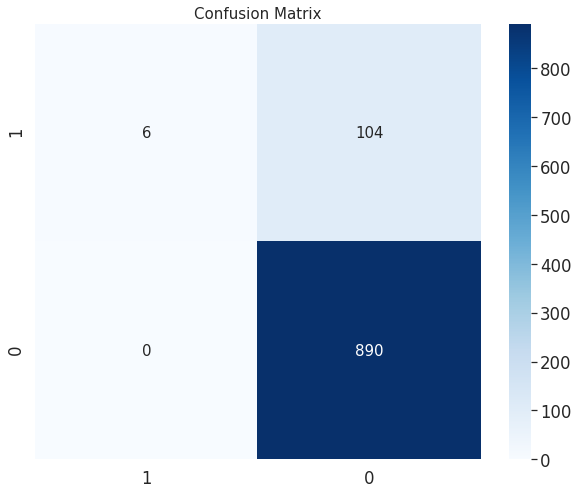

In [ ]:
# Ve ma tran nham lan
plt.figure(figsize=(10,8))
df_cm = pd.DataFrame(cf, index = pd.Series(y_true).unique(),
                  columns = pd.Series(y_true).unique())

ax = plt.subplot()
sn.set(font_scale=1.5) # Adjust to fit

# Labels, title and ticks
label_font = {'size':'15'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Observed labels', fontdict=label_font);

title_font = {'size':'15'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font);

sn.heatmap(df_cm, annot=True, ax=ax, cmap="Blues", fmt="g", annot_kws={"size": 15});  
# sn.heatmap(df_cm, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 10})

# Demo

In [ ]:
!pip install pyvi

     |████████████████████████████████| 8.5MB 18.2MB/s 
     |████████████████████████████████| 747kB 35.1MB/s 


In [ ]:
import pickle
import re
from pyvi import ViTokenizer, ViPosTagger

In [ ]:
#Load Stop word
with open(path + "SourceCode/Thu_LogisticRegression/vietnamese-stopwords.txt") as f:
  stopwords = [x.rstrip() for x in f]
print(stopwords)

#Xóa stop word
def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in stopwords:
            words.append(word)
    return ' '.join(words)

#Tiền xử lý
def preProcess(X_data):
  X_data = X_data.lower()
  X_data = ViTokenizer.tokenize(X_data) #Tách từ
  X_data = re.sub(r'\W+', ' ', X_data) #Bỏ ký tự đặt biệt
  X_data = re.sub(r'\w*\d\w*', '', X_data).strip() #Xóa các số và từ có số
  X_data = remove_stopwords(X_data) #Xóa stop word
  return X_data

['a lô', 'a ha', 'ai', 'ai ai', 'ai nấy', 'ai đó', 'alô', 'amen', 'anh', 'anh ấy', 'ba', 'ba ba', 'ba bản', 'ba cùng', 'ba họ', 'ba ngày', 'ba ngôi', 'ba tăng', 'bao giờ', 'bao lâu', 'bao nhiêu', 'bao nả', 'bay biến', 'biết', 'biết bao', 'biết bao nhiêu', 'biết chắc', 'biết chừng nào', 'biết mình', 'biết mấy', 'biết thế', 'biết trước', 'biết việc', 'biết đâu', 'biết đâu chừng', 'biết đâu đấy', 'biết được', 'buổi', 'buổi làm', 'buổi mới', 'buổi ngày', 'buổi sớm', 'bà', 'bà ấy', 'bài', 'bài bác', 'bài bỏ', 'bài cái', 'bác', 'bán', 'bán cấp', 'bán dạ', 'bán thế', 'bây bẩy', 'bây chừ', 'bây giờ', 'bây nhiêu', 'bèn', 'béng', 'bên', 'bên bị', 'bên có', 'bên cạnh', 'bông', 'bước', 'bước khỏi', 'bước tới', 'bước đi', 'bạn', 'bản', 'bản bộ', 'bản riêng', 'bản thân', 'bản ý', 'bất chợt', 'bất cứ', 'bất giác', 'bất kì', 'bất kể', 'bất kỳ', 'bất luận', 'bất ngờ', 'bất nhược', 'bất quá', 'bất quá chỉ', 'bất thình lình', 'bất tử', 'bất đồ', 'bấy', 'bấy chầy', 'bấy chừ', 'bấy giờ', 'bấy lâu', 'bấy lâ

In [ ]:
#Load model
with open('LogisticRegression.pkl', 'rb') as f:
    lr = pickle.load(f)

In [ ]:
with open('le.pkl', 'rb') as f:
    le = pickle.load(f)
with open('tfidf_vect.pkl', 'rb') as f:
    tfidf_vect = pickle.load(f)

In [ ]:
Sentence = input("Enter comment: ")
Sentence = preProcess(Sentence)
Sentence_tfidf = tfidf_vect.transform([Sentence])
result = lr.predict(Sentence_tfidf)
print('Toxicity: ', le.inverse_transform(result))

Enter comment: Chúc mừng đội tuyển Việt Nam
Toxicity:  [0]
